# **The Mathematics of Decision Tree**
### Nama : Nathan Ramadhani
### NIM : 41521010002
*11 Desember 2023*

***



### **Table of Content**

* [1. Pendahuluan](#1)
    * [1.1 Latar Belakang](#1.1)
    * [1.2 Rumusan Masalah](#1.2)
    
* [2. Memuat Library yang diperlukan and Membaca file Excel](#2)
    * [2.1 Memuat Library yang diperlukan](#2.1)
    * [2.2 Membaca Dataset](#2.2)
    * [2.3 Menampilkan Data](#2.3)
    * [2.4 Deskripsi data](#2.4)
    * [2.5 Informasi data](#2.5)
    * [2.6 Univariate](#2.6)
    
* [3. Decision Tree](#3)
    * [3.1 Entropy](#3.1)
    * [3.2 Gini impurity](#3.2)
    * [3.3 Information gain](#3.3)
    * [3.4 Decision Tree building - algorithm](#3.4)
    * [3.5 F1 Score / Accuracy](#3.5)

## <a id="1">1. Pendahuluan </a>

### <a id="1.1">1.1 Latar Belakang </a>

Sebelum adanya algoritma decision tree, banyak metode statistik atau teknik pemodelan yang dapat digunakan untuk membuat prediksi atau pengklasifikasian. Beberapa metode statistik atau teknik pemodelan tersebut diantaranya adalah:

1.   Regresi Linear
2.   Analisis Diskriminan
3.   Naive Bayes
4.   Metode K-Nearest Neighbors (K-NN)

Keempat metode pendekatan di atas memiliki kelebihan dan kekurangannya masing-masing. Kekurangan dari beberapa metode ini adalah kompleksitas dan batasan data yang harus dipenuhi. Decision tree muncul sebagai pendekatan yang lebih fleksibel, mudah diinterpretasikan, dan mampu menangani baik klasifikasi maupun regresi. Decision tree juga memberikan cara yang lebih intuitif untuk merepresentasikan aturan pengambilan keputusan dan memiliki kemampuan untuk menangani data yang kompleks dengan baik.

Decision Tree merupakan algoritma yang digunakan untuk mengambil keputusan atau membuat suatu klasifikasi. Konsep Decision Tree mirip seperti pohon keputusan.  Hasil akhir dari algoritma ini adalah pohon dengan node keputusan yang dapat memiliki cabang lebih dari satu.

### <a id="1.2">1.2 Rumusan Masalah
Pada program Decision Tree ini mengambil studi kasus pada ***kecelakaan kereta***. Dengan beberapa attribut diantaranya:

1. 'PassengerId' adalah identifikasi unik untuk setiap penumpang.

2. 'Survived' menunjukkan apakah penumpang selamat atau tidak (0 = Tidak, 1 = Ya),

3. 'Pclass' mewakili kelas tiket (1 = 1st, 2 = 2nd, 3 = 3rd).

4. 'Sex' mewakili jenis kelamin penumpang (male = 1 dan female = 0).

5. 'Age' mewakili usia penumpang.

6. 'SibSp' mewakili jumlah saudara/suami-istri di kereta.

7. 'Parch' mewakili jumlah orangtua/anak di kereta.

8. 'Fare' mewakili tarif penumpang.

9. 'Embarked' mewakili pelabuhan keberangkatan (C = Cherbourg = 0, Q = Queenstown = 1, S = Southampton = 2)

### <a id="1.3">1.3 Tujuan
Tujuan adanya program Decision Tree ini adalah ***untuk memprediksi*** penumpang yang selamat berdasarkan umur, jumlah orang tua/anak di dalam kereta dan jumlah saudara/suami dan istri di dalam kereta.

## <a id="2">2. Memuat Library dan Membaca Dataset</a>

### <a id="2.1">2.1 Memuat Library Awal yang Diperlukan</a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### <a id="2.2">2.2 Membaca Dataset</a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/My Drive/Colab Notebooks/decision tree'
data = pd.read_csv(PATH + "/train.csv")
data_asli =  pd.read_csv(PATH + "/train.csv")

Mounted at /content/drive


### <a id="2.3">2.3 Menampilkan Data</a>

**Data Asli**

In [11]:
data_asli

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Menghitung Jumlah Baris dan Kolom Dataset Asli**

In [4]:
print("Jumlah baris dan kolom dalam dataset:", data_asli.shape) # (baris, kolom)

Jumlah baris dan kolom dalam dataset: (891, 12)


**Data Olahan**

In [10]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2.0
1,2,1,1,0,38.0,1,0,71.2833,0.0
2,3,1,3,0,26.0,0,0,7.9250,2.0
3,4,1,1,0,35.0,1,0,53.1000,2.0
4,5,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2.0
887,888,1,1,0,19.0,0,0,30.0000,2.0
888,889,0,3,0,NaN,1,2,23.4500,2.0
889,890,1,1,1,26.0,0,0,30.0000,0.0


**Menghitung Jumlah Baris dan Kolom Dataset Olahan**

In [8]:
print("Jumlah baris dan kolom dalam dataset:", data.shape) # (baris, kolom)

Jumlah baris dan kolom dalam dataset: (891, 9)


**Menghilanglan 3 Kolom Karena tidak akan Digunakan, Agar Pemrosesan Menjadi Ringan.**

**Kolom Tersebut Diantaranya : Name, Ticket and Cabin.**

In [7]:
data = data.drop(columns=['Name','Ticket','Cabin'])
len(data)

891

**Mengubah Nilai dari Attribute "Sex" dan "Embarked" Menjadi Numerik**

In [9]:
# Ubah nilai 'female' menjadi 0 dan 'male' menjadi 1
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

# Ubah nilai 'C' menjadi 0, 'Q' menjadi 1 dan 'S' menjadi 2
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

**Mengecek Missing Value**

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


**Mengisi Nilai NaN Pada Attribut "Age" Berdasarkan Mean**

In [ ]:
import math
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

# Menggunakan data yang sudah ada dalam DataFrame 'data'
data['Age'] = data['Age'].apply(lambda x: math.ceil(x))

**Mengisi Nilai NaN Pada Attribut "Embarked" Berdasarkan Modulus**

In [ ]:
# Mencari modus dari kolom 'Embarked'
mode_embarked = data['Embarked'].mode()[0]  # Mendapatkan modus

# Mengganti nilai NaN dengan modus
data['Embarked'].fillna(mode_embarked, inplace=True)
data['Embarked'] = data['Embarked'].astype(int)

### <a id="1.4">1.4 Deskripsi Data</a>

In [ ]:
data[['PassengerId','Survived','Pclass','Sex','Age','SibSp', 'Parch','Fare','Embarked']].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.771044,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002476,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### <a id="1.5">1.5 Informasi Data</a>

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
None


### <a id="1.6">1.6 Univariate</a>

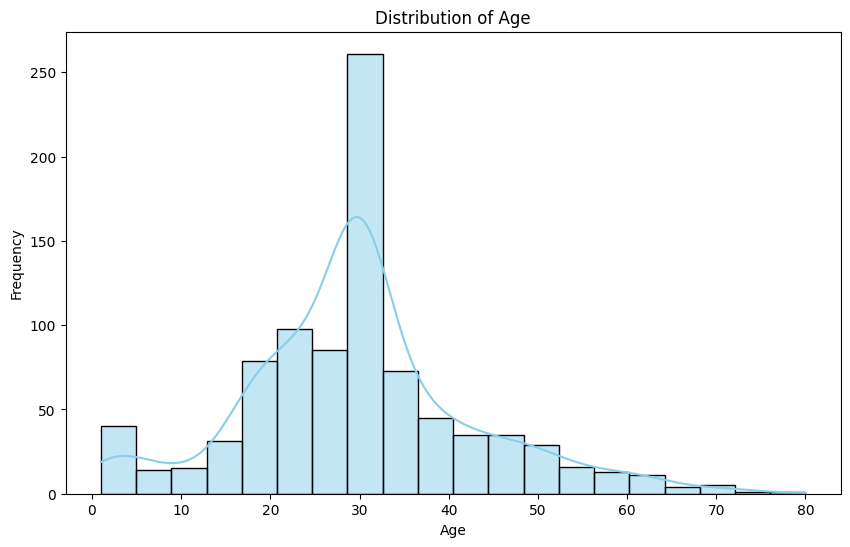

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### <a id="1.7">1.7 Multivariate</a>

**Heatmap (Korelasi antara Atribut Numerik):**

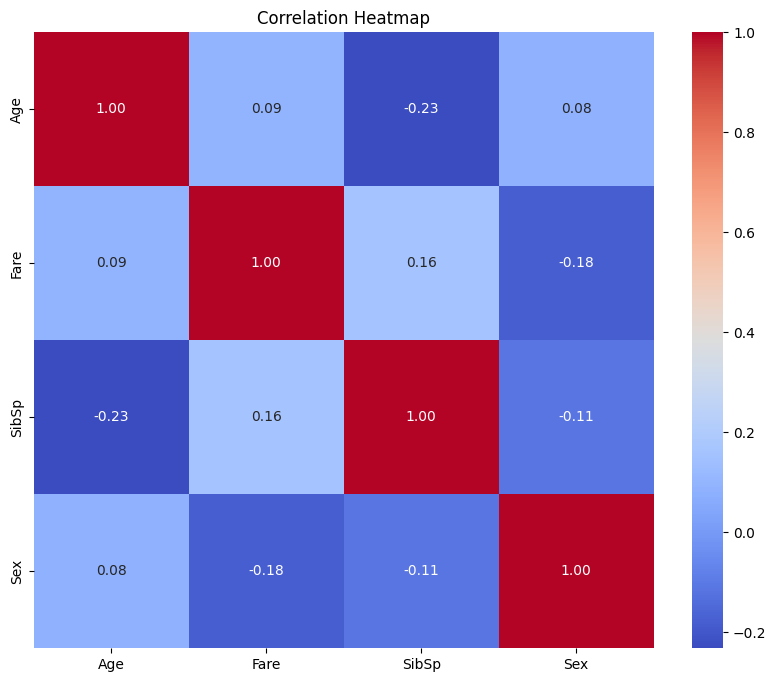

In [ ]:
# Korelasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Age', 'Fare', 'SibSp', 'Sex']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Box Plot (Hubungan antara Variabel Kategorikal dan Variabel Numerik):**

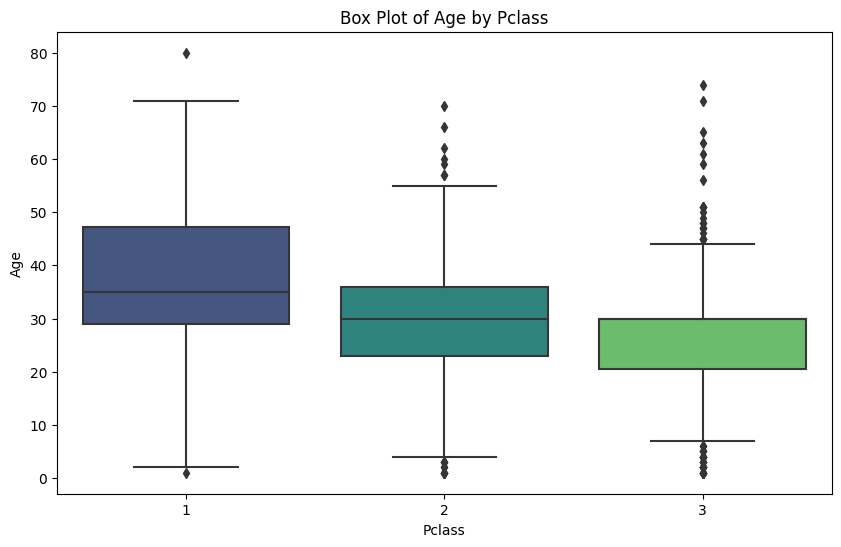

In [ ]:
# Box plot antara 'Pclass' dan 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=data, palette='viridis')
plt.title('Box Plot of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

**Scatter Plot (Hubungan antara Dua Variabel Numerik):**

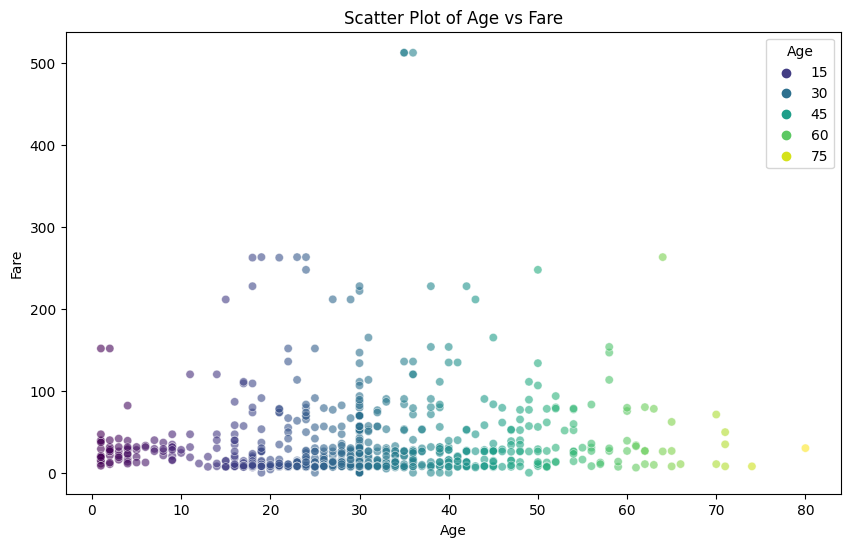

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=data, hue='Age', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Age', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Mengecek apakah ada nilai NaN di setiap baris
nan_rows = data[data.isnull().any(axis=1)]

# Menampilkan baris-baris yang mengandung nilai NaN
print("Baris dengan nilai NaN:")
print(nan_rows)

Baris dengan nilai NaN:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.8      | 0.866242 |   0.831804 | 157        |
| 1            |    0.785714 | 0.693694 |   0.736842 | 111        |
| accuracy     |    0.794776 | 0.794776 |   0.794776 |   0.794776 |
| macro avg    |    0.792857 | 0.779968 |   0.784323 | 268        |
| weighted avg |    0.794083 | 0.794776 |   0.792473 | 268        |


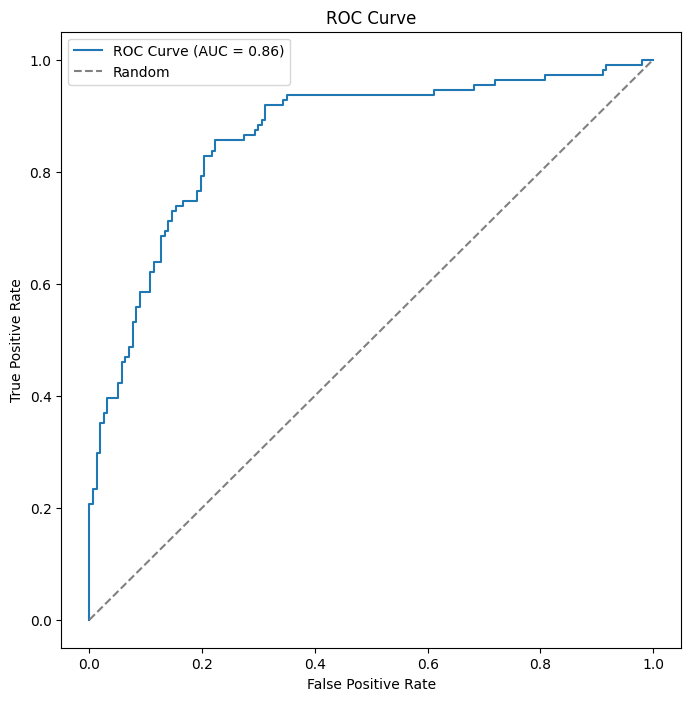

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Pisahkan fitur (features) dan target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Mengganti kolom 'Embarked' dengan 'PassengerId'
X['Embarked'] = X['PassengerId']

# Pisahkan data menjadi data training (70%) dan data testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model (contoh menggunakan Logistic Regression)
model = LogisticRegression()

# Latih model dengan data training
model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Dapatkan prediksi probabilitas untuk setiap kelas
y_prob = model.predict_proba(X_test)[:, 1]  # Ambil probabilitas untuk kelas 1

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_prob)

# Konversi laporan klasifikasi ke dalam bentuk DataFrame
report_df = pd.DataFrame(classification_rep).transpose()

# Tampilkan laporan klasifikasi dalam format tabel dengan garis-garis
print("\nClassification Report:")
print(report_df.to_markdown())




# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()




## <a id="2"> 2. Decision Tree </a>

Langkah selanjutnya adalah membuat model **Decision Tree** !

Berikut merupakan contoh model Decision Tree :

![](https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png)

Untuk membagi cabang pada Decision Tree, ada beberapa hal yang perlu diperhatikan, diantaranya:
* Entropy
* Gini impurity
* Information gain



### <a id="2.1">Entropy</a>

Rumus Entropy :
$$ H(T) = I_E(p_1,p_2, ... , p_J) = - \sum_{i=1}^J p_i log_2 p_i$$

Dimana $p_1, p_2, ...$ merupakan pecahan yang dijumlahkan hingga mewakili persentase setiap kelas yang ada pada simpul anak (simpul untuk nilai fitur tertentu). Dan $J$ adalah jumlah kelas/jumlah kejadian.

Contoh : kita memiliki 10 baris pada variabel $X$. Berikut adalah datanya : $X = [A, A, A, A, B, B, B, C, C, C]$

Untuk mendapatkan nilai $p$ kita harus menjumlahkan jumlah varibel yang sama, kemudian membaginya dengan banyak kejadian pada variabel $X$ :

$$p_A = \frac{(number\space of\space A)}{(length\space of\space X)} = \frac{4}{10} = 0.4 $$

$$p_B = \frac{(number\space of\space B)}{(length\space of\space X)} = \frac{3}{10} = 0.3 $$

$$p_C = \frac{(number\space of\space C)}{(length\space of\space X)} = \frac{3}{10} = 0.3 $$

Kemudian kita dapat menghitung nilai Entropy :

$= -(p_A log_2 p_A + p_B log_2 p_B + p_C log_2 p_C )\\
= -(0.4 \times (-1.3219) + 0.3 \times  (-1.737) + 0.3 \times  (-1.737) )\\
=-( -0.529 -0.5211 -0.5211 )\\
= 1.571$

Berikut program untuk menghitung nilai Entropy !

In [ ]:
def entropy(data, y_col):
    # Get all the values for the Y column
    y_val = data[y_col].value_counts().index.values
    # Get the vector with the number of element for each Y class
    tmp = np.array([len(data[data[y_col] == y_val[i]]) for i in range(0, len(y_val))])
    return sum(-tmp / len(data) * np.log2(tmp / len(data)))

### <a id="2.2">2.2 Gini impurity</a>

Rumus untuk menghitung nilai Gini Impurity hampir mirip dengan Rumus menghitung Entropy :

$$ H(T) =  I_G(p_1,p_2, ... , p_J) = 1 - \sum_{i=1}^J p_i^2$$

Berikut program untuk menghitung nilai Gini Impurity

In [ ]:
def gini_impurity(data, y_col):
    # Get all the values for the Y column
    y_val = data[y_col].value_counts().index.values
    # Get the vector with the number of element for each Y class
    tmp = np.array([len(data[data[y_col] == y_val[i]]) for i in range(0, len(y_val))])
    return 1 - sum((tmp / len(data))**2)

### <a id="2.3">2.3 Information gain</a>

Untuk mengetahui informasi nilai gain sangat penting karena mempermudah kita untuk mendapatkan keuntungan ketika ingin membuat cabang pada model Decision Tree. Untuk itu, perlu diperkenalkan gagasan tentang induk dan anak.

Di dalam model Decision Tree terdapat Induk dan anak Induk. Induk merupakan tempat untuk menampung data keseluruhan dan anak-anak adalah tempat yang berisi data yang telah disaring oleh nilai fitur (jika kita menjumlahkan panjang setiap anak, maka akan menghasilkan panjang induk).

Berikut contohnya :

In [ ]:
test = pd.DataFrame(data=[['A',1],['A',1],['A',1],['B',1],['B',0],['B',0]]
                    , columns=['letter','bit'])
test

,letter,bit
0,A,1
1,A,1
2,A,1
3,B,1
4,B,0
5,B,0


Jadi, nilai entropi dan nilai Gini Impurity yang berasal dari induknya atau root, didasarkan pada semua baris dataset ini, tetapi jika kita ingin anak-anaknya atau childern didasarkan pada jumlah variabel ***letter***, inilah yang akan menjadi anak-anaknya:

In [ ]:
display(test[test['letter'] == 'A'])
display(test[test['letter'] == 'B'])

,letter,bit
0,A,1
1,A,1
2,A,1


,letter,bit
3,B,1
4,B,0
5,B,0


Pada umumnya, nilai dari information gain digunakan bersamaan nilai entropi, tetapi pada program ini menggunakan nilai entropi dan nilai gini impurity.

Rumus :

$$
  \overbrace{IG(T, a)}^\text{Information Gain} = \overbrace{H(T)}^\text{Entropy / Gini (parent)} - \overbrace{H(T\space|\space a)}^\text{Weighted Sum of Entropy / Gini (Children)}
 $$

 Rumus akhir :
 $$
 IG(T, a) = Entropy(T) - \sum_a{p(a) Entropy(T\space | \space a)}
 $$

Program implementasi rumus tersebut ! 😉

In [ ]:
def info_gain(data, feature_col, y_col, criterion='entropy'):
    # Get all the values for this feature
    feature_val = data[feature_col].value_counts().index.values
    # Get the vector of the number of element for each class
    len_feat = np.array([len(data[data[feature_col] == feature_val[i]]) for i in range(0, len(feature_val))])
    # Get the vector of the criterion for each class
    if criterion == 'entropy':
        crit_feat = np.array([entropy(data[data[feature_col] == feature_val[i]], y_col) for i in range(0, len(feature_val))])
        gain = entropy(data, y_col) - sum((len_feat / len(data)) * crit_feat)
    elif criterion == 'gini':
        crit_feat = np.array([gini_impurity(data[data[feature_col] == feature_val[i]], y_col) for i in range(0, len(feature_val))])
        gain = gini_impurity(data, y_col) - sum((len_feat / len(data)) * crit_feat)
    return gain

### <a id="2.4">2.4 Decision Tree building - algorithm</a>

Inilah bagian tersulit dalam Decision tree: membangun algoritma untuk memprediksi output.

Pertanyaan pertama adalah **bagaimana cara mengetahui di mana harus membagi? **

Untuk menangani nilai dari variabel berlanjut, Jawabannya adalah dengan mengubahnya menjadi variabel boolean (True atau False), kita dapat mengambil contoh: nilai *Tarif* kita dapat memilih untuk membaginya dengan nilai 50 --> *Tarif atau <= 50*.

Algoritma :

**Step 1 :** Urutkan nilai dari variabel : $[v_1, v_2, ..., v_n]$

**Step 2 :** For i = 1 ... n- 1 : mengambil entropy / gini impurity untuk variabel baru :
$$ data <= \frac{(v_i + v_{i+1})}{2} $$
Kemudian kita pilih yang terbaik untuk displit.

**Sekarang kita sudah memiliki variabel untuk displit !**

Kemudian kita membuat n daun di mana n adalah jumlah kelas dari variabel tersebut, setelah itu kita mengulangi operasi pada anak-anak daun.

Berikut adalah algoritma kita untuk membangun model Decision Tree! Sekarang mari kita program

Untuk memulai, kita memerlukan beberapa informasi:
* Data
* Nama kolom yang ingin kita prediksi
* Nama semua fitur kategorikal
* Nama semua fitur kontinu
* Metrik mana yang akan digunakan untuk mengevaluasi model kita: gini atau entropi
* Kedalaman maksimum pohon

In [ ]:
class DecisionTree:
    def __init__(self, data, y_col, cat_cols=[], cont_cols=[], criterion='entropy', max_depth=5):
        self.data = data
        self.y_col = y_col
        self.cat_cols = cat_cols
        self.cont_cols = cont_cols
        self.criterion = criterion
        self.leaves = list()
        self.max_depth = max_depth if len(cat_cols) > max_depth or len(cont_cols) > 0 else len(cat_cols)

    def get_best_split_continuous(self, feature_col, data):
        # Init best gain and best split
        best_gain, best_split = -1, -1
        # Get all the values for this feature
        feat_val = data[feature_col].drop_duplicates().sort_values().reset_index(drop=True).dropna()
        # Get the information gain for each feature and keep the best
        for i in range(1, len(feat_val)):
            split = (feat_val[i - 1] + feat_val[i]) / 2
            data[feature_col + '_tmp'] = data[feature_col] <= split
            gain = info_gain(data, feature_col + '_tmp', self.y_col, criterion=self.criterion)
            best_gain, best_split = (gain, split) if best_gain < gain else (best_gain, best_split)
        return best_split, best_gain

    def get_best_feat_leaf(self, data, leaf=None):
        cat_cols = [c for c in self.cat_cols if c not in leaf.get_feat_parent()] if leaf is not None else self.cat_cols
        all_gains = [info_gain(data, c, self.y_col, criterion=self.criterion) for c in cat_cols]
        continuous = [(c, self.get_best_split_continuous(c, data)) for c in self.cont_cols]
        cont_gains = [c[1][1] for c in continuous]

        all_gains = all_gains + cont_gains if len(continuous) > 0 and len(all_gains) > 0 else all_gains if len(
            all_gains) > 0 else cont_gains
        all_cols = cat_cols + self.cont_cols if len(cat_cols) > 0 and len(self.cont_cols) > 0 else cat_cols if len(
            cat_cols) > 0 else cont_cols

        best_feat = pd.Series(data=all_gains, index=all_cols).idxmax()

        return best_feat if best_feat not in cont_cols else [c for c in continuous if c[0] == best_feat][0]

    def learn(self):
        t0 = time()
        print('----- START LEARNING -----')
        # Get the first feature where to split
        feat = self.get_best_feat_leaf(self.data)
        split = None

        # If the type is not a string then it's a continuous feature
        # and we get the best value to split
        if (type(feat) != type(str())):
            split = feat[1][0]
            feat = feat[0]

        # Add it to the Tree
        self.leaves.append(Leaf(None
                                , None
                                , self.data
                                , feat
                                , self.data[self.y_col]
                                , split))

        for i in range (1, self.max_depth):
            print('----- BEGIN DEPTH '+str(i)+' at %0.4f s -----' % (time() - t0))
            # Get all the leaves that are in the upper depth
            leaves_parent = [l for l in self.leaves if l.depth == i-1]

            # If there is 0 parent we can stop the learning algorithm
            if(len(leaves_parent) == 0):
                break
            else:
                for leaf in leaves_parent:
                    # If there is only one value that means it's useless to split
                    # because we already have our prediction
                    if(len(leaf.values) == 1):
                        continue
                    # Get all values for the current feature
                    feature_val = leaf.data[leaf.feature] <= leaf.split if leaf.split is not None else leaf.data[leaf.feature]
                    feature_val = feature_val.value_counts().index.values

                    # Add all possibilities to the Tree
                    for k in range(0, len(feature_val)):
                        if leaf.split is None:
                            data = leaf.data[leaf.data[leaf.feature] == feature_val[k]]
                        else:
                            split_cond = leaf.data[leaf.feature] <= leaf.split
                            data = leaf.data[split_cond == feature_val[k]]

                        if len(data) > 0:
                            # Get the best feature for the split
                            next_feat = self.get_best_feat_leaf(data, leaf)

                            split = None

                            # If the type is not a string then it's a continuous feature
                            # and we get the best value to split
                            if (type(next_feat) != type(str())):
                                split = next_feat[1][0]
                                next_feat = next_feat[0]

                            self.leaves.append(Leaf(prev_leaf=leaf
                                                , condition=feature_val[k]
                                                , data=data
                                                , feature=next_feat
                                                , values=data[self.y_col]
                                                , split=split))
        print('Number of leaves : '+str(len(self.leaves)))
        print('----- END LEARNING : %0.4f s-----' % (time() - t0))
        print()

    def display_final_leaves(self):
        leaves = [l for l in self.leaves if len(l.values) == 1 or l.depth == self.max_depth]
        for l in leaves:
            l.display()

    def predict(self, data):
        pred = list()
        for i in range(0, len(data)):
            row = data.iloc[i,:]
            leaf = self.leaves[0]
            while(len(leaf.values) > 1 and leaf.depth < self.max_depth):
                if leaf.split is None:
                    tmp_leaf = [l for l in self.leaves if (l.prev_leaf == leaf and l.condition == row[leaf.feature])]
                else:
                    tmp_leaf = [l for l in self.leaves if (l.prev_leaf == leaf and l.condition == (row[leaf.feature] <= leaf.split))]
                if (len(tmp_leaf) > 0):
                    leaf = tmp_leaf[0]
                else:
                    break
            pred.append(leaf.pred_class)
        return pred

class Leaf:
    def __init__(self, prev_leaf, condition, data, feature, values, split=None):
        self.prev_leaf = prev_leaf
        self.depth = 0 if prev_leaf is None else prev_leaf.depth+1
        self.condition = condition
        self.data = data
        self.feature = feature
        self.values = values.value_counts(sort=False)
        self.pred_class = self.set_predict_class()
        self.split = split

    def set_predict_class(self):
        return self.values.idxmax()

    def get_feat_parent(self):
        cols = [self.feature]
        leaf = self
        while(leaf.prev_leaf is not None):
            cols.append(leaf.prev_leaf.feature)
            leaf = leaf.prev_leaf
        return cols

    def display(self):
        cond = ''
        leaf = self
        while(leaf.prev_leaf is not None):
            if leaf.prev_leaf.split is None:
                cond = str(leaf.prev_leaf.feature)+' : '+str(leaf.condition)+' --> '+cond
            else:
                cond = str(leaf.prev_leaf.feature)+' <= '+str(round(leaf.prev_leaf.split,2))+' : '+str(leaf.condition)+' --> '+cond
            leaf = leaf.prev_leaf
        print(cond+' prediction : '+str(self.pred_class))



Jadi fungsi utama dari Decision tree adalah fungsi *learn* yang menjalankan algoritma pembangunan. Di dalam program, juga sudah ditambahkan sebuah fungsi yang menampilkan semua jalur yang memberikan prediksi.


In [ ]:
cat_cols = ['Sex', 'Embarked', 'SibSp', 'Parch']
cont_cols = ['Age', 'Fare']

tree_gini = DecisionTree(data, 'Survived', cat_cols=cat_cols, cont_cols=cont_cols, criterion='gini', max_depth=5)
tree_entr = DecisionTree(data, 'Survived', cat_cols=cat_cols, cont_cols=cont_cols, criterion='entropy', max_depth=5)
tree_gini.learn()
tree_entr.learn()

----- START LEARNING -----
----- BEGIN DEPTH 1 at 3.4312 s -----


<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f5

----- BEGIN DEPTH 2 at 13.2889 s -----


<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f5

----- BEGIN DEPTH 3 at 19.8705 s -----


<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f5

----- BEGIN DEPTH 4 at 25.6445 s -----


Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Number of leaves : 68
----- END LEARNING : 31.0510 s-----

----- START LEARNING -----
----- BEGIN DEPTH 1 at 1.9181 s -----


<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f5

----- BEGIN DEPTH 2 at 5.5119 s -----


<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f5

----- BEGIN DEPTH 3 at 10.4481 s -----


Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

----- BEGIN DEPTH 4 at 16.1552 s -----


<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f5

Number of leaves : 60
----- END LEARNING : 21.1510 s-----



<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f51194ceea>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-58f5

Untuk visualisasi Tree sangat sulit untuk diprogram, berikut contoh visualisasi sederhananya.

In [ ]:
print('----- GINI TREE -----')
tree_gini.display_final_leaves()
print()
print('----- ENTROPY TREE -----')
tree_entr.display_final_leaves()

----- GINI TREE -----
Sex : 0 --> SibSp : 8 -->  prediction : 0
Sex : 0 --> SibSp : 5 -->  prediction : 0
Sex : 1 --> Age <= 6.5 : True --> SibSp : 1 -->  prediction : 1
Sex : 1 --> Age <= 6.5 : True --> SibSp : 0 -->  prediction : 1
Sex : 1 --> Age <= 6.5 : True --> SibSp : 3 -->  prediction : 0
Sex : 1 --> Age <= 6.5 : True --> SibSp : 2 -->  prediction : 1
Sex : 1 --> Age <= 6.5 : True --> SibSp : 5 -->  prediction : 0
Sex : 0 --> SibSp : 2 --> Fare <= 18.38 : True -->  prediction : 0
Sex : 0 --> SibSp : 3 --> Parch : 1 -->  prediction : 0
Sex : 0 --> SibSp : 3 --> Parch : 0 -->  prediction : 1
Sex : 0 --> SibSp : 4 --> Age <= 14.0 : False -->  prediction : 1
Sex : 1 --> Age <= 6.5 : False --> Fare <= 26.27 : False --> SibSp : 4 -->  prediction : 0
Sex : 1 --> Age <= 6.5 : False --> Fare <= 26.27 : False --> SibSp : 8 -->  prediction : 0
Sex : 1 --> Age <= 6.5 : False --> Fare <= 26.27 : False --> SibSp : 5 -->  prediction : 0
Sex : 1 --> Age <= 6.5 : False --> Fare <= 26.27 : False

**Kode Untuk Membuat Visualisasi Gini Tree**

In [ ]:
from graphviz import Digraph

# Inisialisasi pohon
dot = Digraph()

# Tambahkan node dan cabang-cabang sesuai aturan
dot.node('A', 'Sex')
dot.node('B', 'SibSp: 8')
dot.node('C', 'SibSp: 5')
dot.node('D', 'Age <= 6.5')
dot.node('E', 'SibSp: 1')
dot.node('F', 'SibSp: 0')
dot.node('G', 'SibSp: 3')
dot.node('H', 'SibSp: 2')
dot.node('I', 'Fare <= 18.38')
dot.node('J', 'Parch: 1')
dot.node('K', 'Parch: 0')
dot.node('L', 'Age <= 14.0')
dot.node('M', 'Fare <= 26.27')
dot.node('N', 'SibSp: 4')
dot.node('O', 'Fare <= 10.48')
dot.node('P', 'Embarked: 0')
dot.node('Q', 'Fare <= 15.37')
dot.node('R', 'Parch: 4')
dot.node('S', 'Parch: 6')
dot.node('T', 'Embarked: 0')
dot.node('U', 'Fare <= 31.33')
dot.node('V', 'Parch: 3')
dot.node('W', 'Parch: 2')
dot.node('X', 'Age <= 16.0')
dot.node('Y', 'Fare <= 31.33')
dot.node('Z', 'Fare <= 31.33')

# Tambahkan edge antar node sesuai aturan
dot.edge('A', 'B', label='False')
dot.edge('A', 'D', label='True')
dot.edge('B', 'C', label='False')
dot.edge('B', 'F', label='True')
dot.edge('D', 'E', label='True')
dot.edge('D', 'G', label='False')
dot.edge('E', 'H', label='False')
dot.edge('E', 'C', label='True')
dot.edge('G', 'F', label='False')
dot.edge('G', 'I', label='True')
dot.edge('H', 'J', label='False')
dot.edge('H', 'K', label='True')
dot.edge('I', 'C', label='False')
dot.edge('I', 'N', label='True')
dot.edge('N', 'M', label='False')
dot.edge('N', 'B', label='True')
dot.edge('O', 'P', label='False')
dot.edge('O', 'Q', label='True')
dot.edge('Q', 'R', label='False')
dot.edge('Q', 'S', label='True')
dot.edge('P', 'K', label='False')
dot.edge('P', 'T', label='True')
dot.edge('R', 'K', label='False')
dot.edge('R', 'S', label='True')
dot.edge('T', 'K', label='False')
dot.edge('T', 'U', label='True')
dot.edge('U', 'M', label='False')
dot.edge('U', 'L', label='True')
dot.edge('V', 'K', label='False')
dot.edge('V', 'W', label='True')
dot.edge('W', 'X', label='False')
dot.edge('W', 'Y', label='True')
dot.edge('Y', 'Z', label='True')

# Simpan dan tampilkan pohon
dot.render('gini_tree', format='png', view=True)


'gini_tree.png'

**Kode Untuk Membuat Visualisasi Entropy Tree**

In [ ]:
from graphviz import Digraph

# Inisialisasi pohon
dot = Digraph()

# Tambahkan node dan cabang-cabang sesuai aturan
dot.node('A', 'Sex')
dot.node('B', 'Fare <= 26.27')
dot.node('C', 'SibSp: 5')
dot.node('D', 'SibSp: 8')
dot.node('E', 'SibSp: 3')
dot.node('F', 'SibSp: 0')
dot.node('G', 'SibSp: 1, Age <= 13.5')
dot.node('H', 'SibSp: 4, Parch: 1')
dot.node('I', 'SibSp: 2, Parch: 1')
dot.node('J', 'SibSp: 1, Fare <= 35.56')
dot.node('K', 'SibSp: 4, Parch: 1')
dot.node('L', 'SibSp: 2, Parch: 1')
dot.node('M', 'SibSp: 0, Parch: 5')
dot.node('N', 'SibSp: 0, Parch: 4')
dot.node('O', 'SibSp: 0, Parch: 3')
dot.node('P', 'SibSp: 2, Parch: 1')
dot.node('Q', 'SibSp: 2, Parch: 2')
dot.node('R', 'SibSp: 2, Parch: 3')
dot.node('S', 'SibSp: 3, Parch: 1')
dot.node('T', 'SibSp: 3, Parch: 0')
dot.node('U', 'SibSp: 3, Parch: 2')
dot.node('V', 'SibSp: 4, Age <= 14.0')
dot.node('W', 'SibSp: 1, Fare <= 149.04')

# Tambahkan edge antar node sesuai aturan
dot.edge('A', 'B', label='False')
dot.edge('A', 'G', label='True')
dot.edge('B', 'C', label='False')
dot.edge('B', 'J', label='True')
dot.edge('C', 'F', label='False')
dot.edge('C', 'I', label='True')
dot.edge('J', 'W', label='True')
dot.edge('J', 'K', label='False')
dot.edge('D', 'K', label='False')
dot.edge('D', 'L', label='True')
dot.edge('E', 'L', label='False')
dot.edge('E', 'P', label='True')
dot.edge('G', 'H', label='False')
dot.edge('G', 'V', label='True')
dot.edge('H', 'S', label='False')
dot.edge('H', 'R', label='True')
dot.edge('I', 'M', label='False')
dot.edge('I', 'N', label='True')
dot.edge('L', 'Q', label='False')
dot.edge('L', 'O', label='True')
dot.edge('P', 'T', label='False')
dot.edge('P', 'U', label='True')

# Simpan dan tampilkan pohon
dot.render('entropy_tree', format='png', view=True)


'entropy_tree.png'

   ### <a id="2.5">2.5 F1 Score / Accuracy</a>
   
  Sekarang kita memiliki dua pohon, satu dengan entropi dan satu lagi dengan gini impurity, kita bisa melihat apakah keduanya memiliki performa yang bagus!

In [ ]:
def plot_confusion_matrix(y_true, y_pred, name):
    trace = go.Heatmap(z=confusion_matrix(y_true, y_pred),
                       x=['Died', 'Survived'],
                       y=['Died', 'Survived'],
                       colorscale='Reds')

    layout = go.Layout(title='Confusion Matrix '+name,
                            xaxis=dict(
                                title='Prediction'
                            ),
                            yaxis=dict(
                                title='Real'
                            )
                        )
    fig = go.Figure(data=[trace], layout=layout)

    py.iplot(fig)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
pred_gini = tree_gini.predict(data)
pred_entr = tree_entr.predict(data)

print('----- GINI TREE -----')
print('F1 Score : '+str(f1_score(data['Survived'], pred_gini)))
print('Accuracy : '+str(accuracy_score(data['Survived'], pred_gini)))
print('----- ENTROPY TREE -----')
print('F1 Score : '+str(f1_score(data['Survived'], pred_entr)))
print('Accuracy : '+str(accuracy_score(data['Survived'], pred_entr)))

plot_confusion_matrix(data['Survived'], pred_gini, 'Gini impurity')
plot_confusion_matrix(data['Survived'], pred_entr, 'Entropy')

----- GINI TREE -----
F1 Score : 0.7692307692307693
Accuracy : 0.8417508417508418
----- ENTROPY TREE -----
F1 Score : 0.7579617834394904
Accuracy : 0.8294051627384961


**Akurasi Skor Dengan Algoritma Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Misalkan 'X' adalah fitur-fitur dan 'y' adalah target
# Disini kita menggunakan X_train, X_test, y_train, y_test sebagai contoh

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
random_forest.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
predictions = random_forest.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7988826815642458


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
random_forest.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
predictions = random_forest.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Laporan Klasifikasi
classification_rep = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(classification_rep).transpose()

# Tampilkan laporan klasifikasi dalam format tabel
print("\nClassification Report:")
print(report_df.to_markdown())


Accuracy: 0.7988826815642458

Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.80531  | 0.866667 |   0.834862 | 105        |
| 1            |    0.787879 | 0.702703 |   0.742857 |  74        |
| accuracy     |    0.798883 | 0.798883 |   0.798883 |   0.798883 |
| macro avg    |    0.796594 | 0.784685 |   0.78886  | 179        |
| weighted avg |    0.798104 | 0.798883 |   0.796827 | 179        |


Thanks you,

Sources :
* [Decision Trees in Machine Learning](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)
* [Wikipedia : Decision Tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Introduction to Decision Tree Learning](https://heartbeat.fritz.ai/introduction-to-decision-tree-learning-cd604f85e236)
* [Coursera : Picking the best threshold to split on](https://www.coursera.org/lecture/ml-classification/optional-picking-the-best-threshold-to-split-on-sKrGp)